# [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

## [Abstract](#abstract)

The Traveling Salesman Problem (TSP) is a **classic problem in [combinatorial optimization](https://en.wikipedia.org/wiki/Combinatorial_optimization)**.

It is the problem of **finding a tour of minimum cost that visits each city exactly once**. The TSP is **NP-hard**. That is, no efficient algorithm is known that finds the optimal solution to the problem for large sets of cities.

## [Exhaustive Search](#exhaustive-search)
It is a **brute force** algorithm that does not use any information about the problem to find the solution.

- [Heap's Algorithm](#heaps-algorithm)
- [Steinhaus–Johnson–Trotter Algorithm](#sjt-algorithm)

## [Random](#random-search)
Is a **[stochastic optimization](https://en.wikipedia.org/wiki/Stochastic_optimization)** algorithm that does not use any information about the problem to find the solution.

## [Hill Climbing](#hill-climbing-search)
Is a **[local search](https://en.wikipedia.org/wiki/Local_search_(optimization))** algorithm that does not use any information about the problem to find the solution.

## Simulated Annealing (not implemented yet)
Is a **[metaheuristic](https://en.wikipedia.org/wiki/Metaheuristic)** algorithm that does not use any information about the problem to find the solution.

----

### Abstract

In this notebook, we're exploring various techniques to solve the [Traveling Salesman Problem (TSP)](https://en.wikipedia.org/wiki/Travelling_salesman_problem).

Our focus is on implementing **exhaustive search**, **random search**, and **hill-climbing algorithms** to tackle this problem. Additionally, **we'll visualize the results of each iteration**, **analyze their performance**, and **draw insightful conclusions**.

By delving into these algorithms and their outcomes, we aim to enhance our understanding of optimization techniques and their practical applications.

In [1]:
import random
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# constants
CITIES = 7  # number of cities
GENERATIONS = 100  # number of generations to run
MUTATION_RATE = 0.01  # mutation rate (0.01 = 1%)

In these part I've define some functions to help us to manage all the algorithms and to visualize the results.

In [2]:
def generate_cities(cities: int) -> np.ndarray:
    """Generate cities with random x and y coordinates."""
    return np.random.rand(cities, 2)

def get_distance_between_cities(city1: np.ndarray, city2: np.ndarray) -> float:
    """Get distance between two cities."""
    return np.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

def plot_solution(title: str, cities: np.ndarray, solution: np.ndarray) -> None:
    """Plot solution."""
    plt.figure(figsize=(12, 12))
    [plt.plot([cities[solution[i]][0], cities[solution[i + 1]][0]], [cities[solution[i]][1], cities[solution[i + 1]][1]], c='blue') for i in range(CITIES - 1)]
    plt.scatter(cities[:, 0], cities[:, 1], c='blue', s=100)
    plt.title(title)
    plt.show()

def print_distances(cities: np.ndarray, solution: np.ndarray) -> None:
    """Print distances between cities according to the order in the solution."""
    print(f"Solution:  {solution}\nDistances: Total {np.sum([get_distance_between_cities(cities[solution[i]], cities[solution[i + 1]]) for i in range(CITIES - 1)])}")
    for i in range(CITIES - 1):
        print(f"{i:2} -> {i+1:2}: {get_distance_between_cities(cities[solution[i]], cities[solution[i + 1]]):4f}")


def calculate_fitness(cities: np.ndarray, population: np.ndarray) -> np.ndarray:
    """Calculate fitness of population."""
    return 1 / get_distance_between_cities(cities, population)

def select_parents(population: np.ndarray, fitness: np.ndarray) -> np.ndarray:
    """Select parents from population."""
    return np.random.choice(population, size=2, replace=False, p=fitness / np.sum(fitness))

def crossover(parents: np.ndarray) -> np.ndarray:
    """Crossover parents to produce offspring."""
    return np.concatenate((parents[0][:CITIES // 2], [city for city in parents[1] if city not in parents[0][:CITIES // 2]]))

def mutate(offspring: np.ndarray) -> np.ndarray:
    """Mutate offspring."""
    if np.random.rand() < MUTATION_RATE:
        offspring = np.random.permutation(offspring)
    return offspring

def generate_offspring(population: np.ndarray, fitness: np.ndarray) -> np.ndarray:
    """Generate offspring from population."""
    parents = select_parents(population, fitness)
    offspring = crossover(parents)
    offspring = mutate(offspring)
    return offspring

def plot_fitness(fitness: np.ndarray) -> None:
    """Plot fitness."""
    plt.figure(figsize=(10, 10))
    plt.plot(fitness)
    plt.show()

<Axes: >

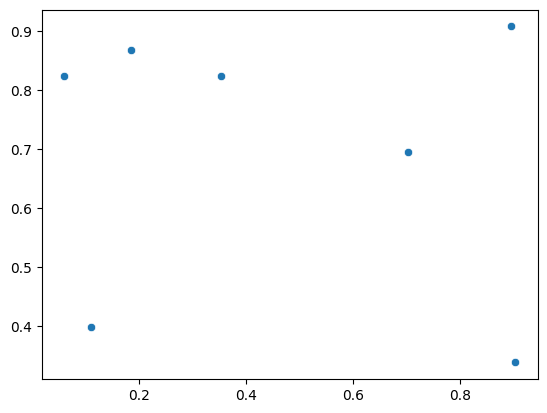

In [3]:
cities = generate_cities(CITIES)  # generate cities
sns.scatterplot(x=cities[:, 0], y=cities[:, 1])  # plot cities

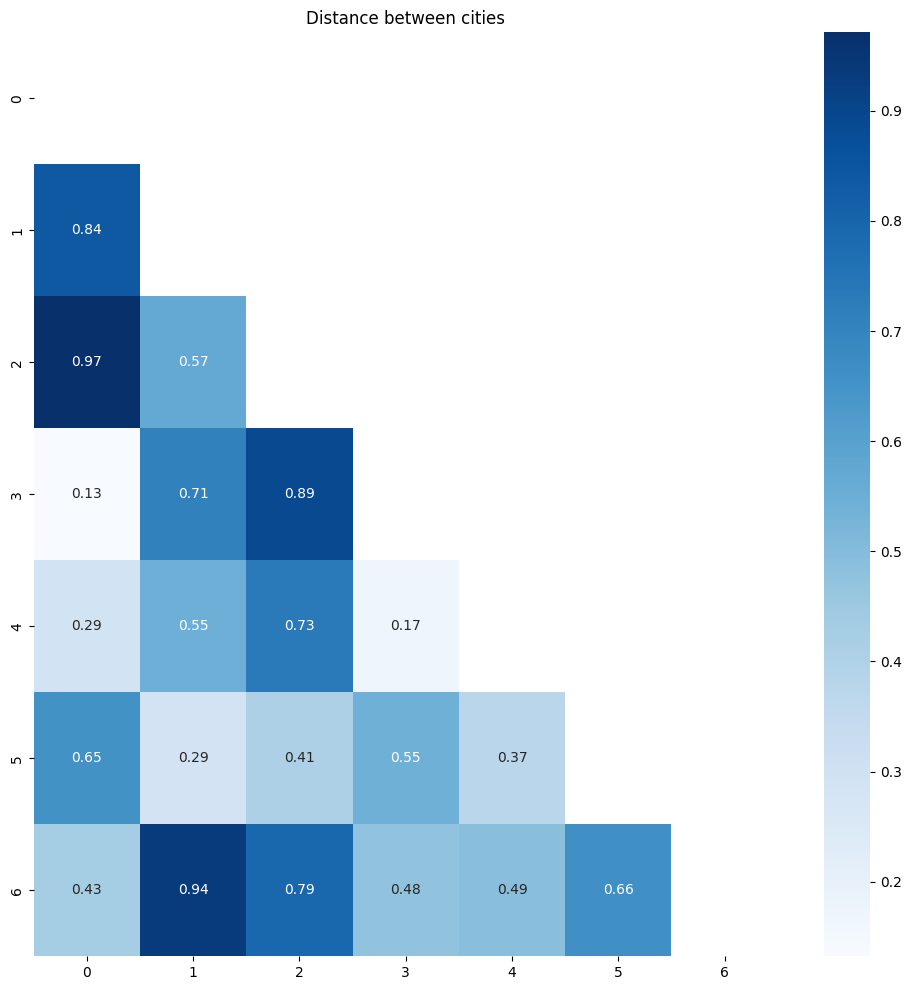

In [4]:
distances = np.zeros((CITIES, CITIES))
for i in range(CITIES):
    for j in range(CITIES):  
        distances[i, j] = get_distance_between_cities(cities[i], cities[j])

# plot the distance between cities (using heatmap)
plt.figure(figsize=(12, 12))
mask = np.zeros_like(distances)  # create a mask
mask[np.triu_indices_from(mask)] = True  # apply the mask
sns.heatmap(distances, annot=True, mask=mask, cmap='Blues')  # plot heatmap
plt.title('Distance between cities')
plt.show()

### [Exhaustive Search](https://en.wikipedia.org/wiki/Exhaustive_search)

We implement a program that generates all possible solutions for the TSP using two algorithms, namely the **Heap algorithm** and the **Steinhaus–Johnson–Trotter algorithm**. By examining the complete solution space, we aim to evaluate the computational feasibility of exhaustively solving TSP for a given number of cities.

- Time Complexity: $O(n!)$
- Space Complexity: $O(n)$

In [5]:
def exhaustive_search(cities: np.ndarray) -> np.ndarray:
    """Exhaustive search algorithm."""
    best_solution = np.arange(CITIES)
    best_fitness = np.sum([get_distance_between_cities(cities[best_solution[i]], cities[best_solution[i + 1]]) for i in range(CITIES - 1)])
    for solution in itertools.permutations(np.arange(CITIES)):
        fitness = np.sum([get_distance_between_cities(cities[solution[i]], cities[solution[i + 1]]) for i in range(CITIES - 1)])
        if fitness < best_fitness:
            best_fitness = fitness
            best_solution = solution
    return best_solution

Solution:  (6, 0, 3, 4, 5, 1, 2)
Distances: Total 1.962937250724882
 0 ->  1: 0.427522
 1 ->  2: 0.132255
 2 ->  3: 0.173850
 3 ->  4: 0.371923
 4 ->  5: 0.287995
 5 ->  6: 0.569392


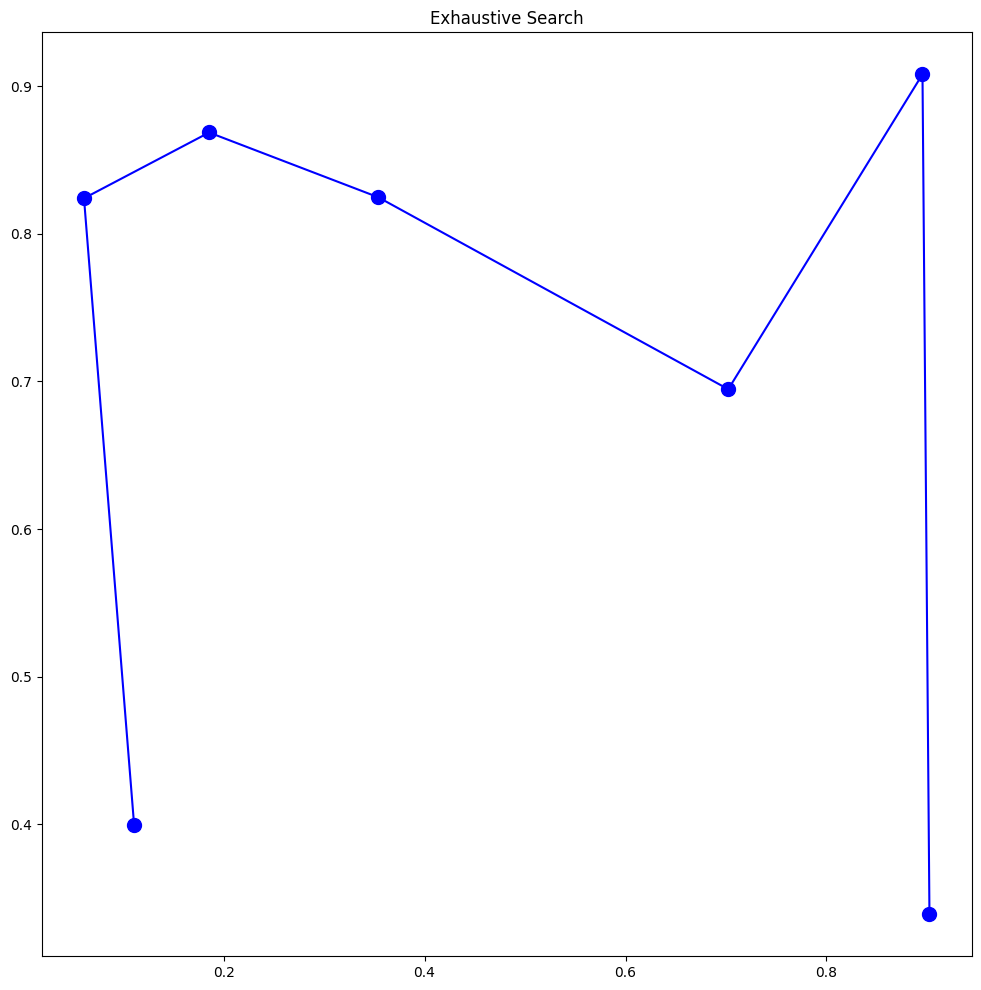

In [7]:
exhaustive_solution = exhaustive_search(cities)

print_distances(cities, exhaustive_solution)
plot_solution("Exhaustive Search", cities, exhaustive_solution)

#### [Heap's Algorithm](https://en.wikipedia.org/wiki/Heap%27s_algorithm)

The Heap's Algorithm constructs all possible permutations of $n$ objects. It is a **[recursive](https://en.wikipedia.org/wiki/Recursion_(computer_science))** algorithm that generates each permutation from the previous one by choosing two elements to interchange.

The algorithm generates each permutation from the previous one by choosing two elements to interchange. The number of permutations of $n$ objects is $n!$.

The algorithm is named after [B. R. Heap](https://en.wikipedia.org/wiki/B._R._Heap), who published it in 1963, but it was first proposed by [Johnson](https://en.wikipedia.org/wiki/Johnson%27s_algorithm) in 1962.

In [ ]:
def heap_algorithm(cities: np.ndarray) -> np.ndarray:
    """Heap algorithm."""
    best_solution = np.arange(CITIES)  # initialize best solution
    best_fitness = np.sum([get_distance_between_cities(cities[best_solution[i]], cities[best_solution[i + 1]]) for i in range(CITIES - 1)])
    c = np.zeros(CITIES, dtype=int)  # initialize c, c is an encoding of the stack state
    i = 0  # initialize i, i is an index of the stack
    while i < CITIES:  # while there are elements on the stack
        if c[i] < i:  # if i < c[i] < len(cities)
            if i % 2 == 0:  # if i is even
                cities[0], cities[i] = cities[i], cities[0]  # swap first and i-th city
            else:  # if i is odd
                cities[c[i]], cities[i] = cities[i], cities[c[i]]  # swap c[i]-th and i-th city
            fitness = np.sum([get_distance_between_cities(cities[i], cities[i + 1]) for i in range(CITIES - 1)])
            if fitness < best_fitness:  # if new fitness is better than best fitness
                best_fitness, best_solution = fitness, cities.copy()
            c[i] += 1  # increase c[i] by one
            i = 0  # reset index i to 0
        else:  # otherwise
            c[i] = 0  # set c[i] to zero
            i += 1  # increase i by one
    return best_solution  # return best solution

#### [SJT Algorithm](https://en.wikipedia.org/wiki/Steinhaus%E2%80%93Johnson%E2%80%93Trotter_algorithm)

The Steinhaus-Johnson-Trotter (SJT) algorithm is a **[recursive](https://en.wikipedia.org/wiki/Recursion_(computer_science))** algorithm that generates each permutation from the previous one by choosing two elements to interchange.

The algorithm generates each permutation from the previous one by choosing two elements to interchange. The number of permutations of $n$ objects is $n!$.

The algorithm is named after [Hugo Steinhaus](https://en.wikipedia.org/wiki/Hugo_Steinhaus), [Selmer M. Johnson](https://en.wikipedia.org/wiki/Selmer_M._Johnson), and [Hale F. Trotter](https://en.wikipedia.org/wiki/Hale_F._Trotter), who published it in 1963, but it was first proposed by [Johnson](https://en.wikipedia.org/wiki/Johnson%27s_algorithm) in 1962.

In [ ]:
def stj_algorithm(cities: np.ndarray) -> np.ndarray:
    """Steinhaus-Johnson-Trotter algorithm."""
    best_solution = np.arange(CITIES)  # initialize best solution
    best_fitness = np.sum([get_distance_between_cities(cities[best_solution[i]], cities[best_solution[i + 1]]) for i in range(CITIES - 1)])
    p = np.arange(CITIES, dtype=int)  # initialize p
    q = np.ones(CITIES, dtype=int)  # initialize q
    i = 1  # initialize i
    while i < CITIES:  # while i < len(cities)
        if q[i] < i + 1:  # if q[i] < i + 1
            if i % 2 == 0:  # if i is even
                cities[0], cities[i] = cities[i], cities[0]  # swap first and i-th city
            else:  # if i is odd
                cities[q[i]], cities[i] = cities[i], cities[q[i]]  # swap q[i]-th and i-th city
            fitness = np.sum([get_distance_between_cities(cities[i], cities[i + 1]) for i in range(CITIES - 1)])
            if fitness < best_fitness:  # if new fitness is better than best fitness
                best_fitness, best_solution = fitness, cities.copy()
            q[i] += 1  # increase q[i] by one
            i = 1  # reset i to one
        else:  # otherwise
            q[i] = 1  # set q[i] to one
            i += 1  # increase i by one
    return best_solution  # return best solution

### [Random Search](https://en.wikipedia.org/wiki/Random_search)

### [Hill Climbing Search](https://en.wikipedia.org/wiki/Hill_climbing)